In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
# pd.set_option('display.max_rows', None)
import numpy as np
import os
import pandas as pd


In [2]:
baseline = pd.read_csv('../main/log/feature_selection20241017.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
baseline2 = pd.read_csv('../main/log/feature_selection_20241121.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
baseline3 = pd.read_csv('../main/log/feature_selection2_20241203.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

baseline = pd.concat((baseline, baseline2))
# baseline = pd.concat((baseline, baseline3))
baseline.reset_index(inplace = True, drop = True)

In [3]:
data = pd.read_csv('../main/log/feature_selection_20241018.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data2 = pd.read_csv('../main/log/feature_selection_20241028.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])
data3 = pd.read_csv('../main/log/feature_selection_20241112.csv', names = ["algo", "experiment", "noise", "dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data = pd.concat((data, data2))
data = pd.concat((data, data3))

data4 = pd.read_csv('../main/log/feature_selection_smart2_20241125.csv', names = ["algo", "experiment",  "noise", "metric","dataset", "seed", "generation",
                                        "training_fitness", "timing", "pop_node_count",
                                        "test_fitness","elite_size", "log"])

data4['algo'] = data4['algo'] + '_' + data4['metric']
data4.drop('metric', axis = 1, inplace = True)

data = pd.concat((data, data4.query("noise != 0")))
data.reset_index(inplace = True, drop = True)

baseline = pd.concat((baseline, data4.query("noise == 0")))
baseline.reset_index(inplace = True, drop = True)

# baseline.drop_duplicates(subse/t = ["algo",  "noise","dataset", "seed", "generation"], keep = 'last', inplace = True)

In [42]:
# Cache unique values to reduce redundant computations
experiments = data.experiment.unique()
algorithms = data.algo.unique()
datasets = data.dataset.unique()
noises = data.noise.unique()

# Pre-filter baseline data for faster access
baseline_filtered = baseline.query("generation == 1000")[["algo", "dataset", "test_fitness"]]
data_filtered = data.query("generation == 1000")[["algo", "dataset", "noise", "experiment", "test_fitness"]]

# Iterate over experiments
for experiment in experiments:
    print(experiment)
    
    for algo in algorithms:
        count = 0  # Initialize the count for the current algorithm
        
        # # Determine the correct algo_b based on the condition
        if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
            algo_b = algo[:9]  # Adjust algo_b if necessary
        else:
            algo_b = algo
        
        if algo_b == 'SLIM*ABS_':
            algo_b = 'SLIM*ABS'
        
        # Iterate over datasets
        for datas in datasets:
            # Get baseline values for the current algorithm and dataset
            baseline_v = baseline_filtered[
                (baseline_filtered["algo"] == algo_b) & 
                (baseline_filtered["dataset"] == datas)
            ]["test_fitness"].to_numpy()
            
            # Skip if no baseline data
            # if len(baseline_v) == 0:
            #     continue
            
            # Iterate over noise levels
            for noise in noises:
                # Get data values for the current combination
                data_v = data_filtered[
                    (data_filtered["algo"] == algo) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["test_fitness"].to_numpy()
                
                # Skip if no data
                # if len(data_v) == 0:
                #     continue
                
                # Perform Mann-Whitney U test
                # try:
                pv = mannwhitneyu(baseline_v, data_v)[1]
                # except ValueError:
                #     continue  # Skip invalid comparisons
                
                # Update count based on the p-value and medians
                if pv < 0.05 and np.median(baseline_v) < np.median(data_v):
                    count += 1
        
        # Output results for the current algorithm
        print(f"{algo}: {count}")
    
    print("\n")


add_noise_to_random_columns
SLIM*1SIG: 7
SLIM*ABS: 4
SLIM+2SIG: 14
GSGP: 11
GSGP*1SIG: 12
GSGP*ABS: 9
SLIM*1SIG_rmse: 4
SLIM*ABS_rmse: 3
SLIM+2SIG_rmse: 5
SLIM*1SIG_sign: 5
SLIM*ABS_sign: 2
SLIM+2SIG_sign: 5
SLIM*1SIG_sign_rmse: 4
SLIM*ABS_sign_rmse: 2
SLIM+2SIG_sign_rmse: 5


add_noise
SLIM*1SIG: 9
SLIM*ABS: 9
SLIM+2SIG: 16
GSGP: 13
GSGP*1SIG: 15
GSGP*ABS: 15
SLIM*1SIG_rmse: 8
SLIM*ABS_rmse: 6
SLIM+2SIG_rmse: 6
SLIM*1SIG_sign: 8
SLIM*ABS_sign: 6
SLIM+2SIG_sign: 6
SLIM*1SIG_sign_rmse: 8
SLIM*ABS_sign_rmse: 6
SLIM+2SIG_sign_rmse: 6




In [32]:
# Cache unique values
experiments = data.experiment.unique()
# algorithms = data.algo.unique()
algorithms = [
            'SLIM+2SIG',  'SLIM+2SIG_rmse', 'SLIM+2SIG_sign', 'SLIM+2SIG_sign_rmse',
            'SLIM*1SIG', 'SLIM*1SIG_rmse','SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse',
            'SLIM*ABS', 'SLIM*ABS_rmse','SLIM*ABS_sign','SLIM*ABS_sign_rmse'
]
datasets = data.dataset.unique()
noises = [1, 5, 10, 50]  # Fixed list of noise levels

# Pre-filter data
baseline_filtered = baseline.query("generation == 1000")[["algo", "dataset", "test_fitness"]]
data_filtered = data.query("generation == 1000")[["algo", "dataset", "noise", "experiment", "test_fitness"]]

# Iterate over experiments
for experiment in experiments:
    print(experiment)
    
    for algo in algorithms:
        count = 0


        # if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
        #     algo_b = algo[:9]
        # else:
        algo_b = algo
        # if algo_b == 'SLIM*ABS_':
        #     algo_b  = 'SLIM*ABS'
        
        for datas in datasets:
            # Get baseline values
            baseline_v = baseline_filtered[
                (baseline_filtered["algo"] == algo_b) & 
                (baseline_filtered["dataset"] == datas)
            ]["test_fitness"].to_numpy()
            
            if len(baseline_v) == 0:
                continue  # Skip if no baseline data
            
            for noise in noises:
                # Get data values for the current noise level
                data_v = data_filtered[
                    (data_filtered["algo"] == algo) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["test_fitness"].to_numpy()
                
                # if len(data_v) == 0:
                #     continue  # Skip if no data
                
                # Perform Mann-Whitney U test
                pv = mannwhitneyu(baseline_v, data_v)[1]
                if pv < 0.05 and np.median(baseline_v) < np.median(data_v):
                    count += 1
        
        # Output results for this algorithm
        print(f"{algo} : {count}")
    
    print("\n")


add_noise_to_random_columns
SLIM+2SIG : 14
SLIM+2SIG_rmse : 13
SLIM+2SIG_sign : 15
SLIM+2SIG_sign_rmse : 14
SLIM*1SIG : 7
SLIM*1SIG_rmse : 10
SLIM*1SIG_sign : 13
SLIM*1SIG_sign_rmse : 9
SLIM*ABS : 4
SLIM*ABS_rmse : 10
SLIM*ABS_sign : 11
SLIM*ABS_sign_rmse : 12


add_noise
SLIM+2SIG : 16
SLIM+2SIG_rmse : 15
SLIM+2SIG_sign : 16


ValueError: `x` and `y` must be of nonzero size.

In [ ]:
# Cache unique values
experiments = data.experiment.unique()
# algorithms = data.algo.unique()
algorithms = [
            'SLIM+2SIG',  'SLIM+2SIG_rmse', 'SLIM+2SIG_sign', 'SLIM+2SIG_sign_rmse',
            'SLIM*1SIG', 'SLIM*1SIG_rmse','SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse',
            'SLIM*ABS', 'SLIM*ABS_rmse','SLIM*ABS_sign','SLIM*ABS_sign_rmse'
]
datasets = data.dataset.unique()
noises = [1, 5, 10, 50]  # Fixed list of noise levels

# Pre-filter data
baseline_filtered = baseline.query("generation == 1000")[["algo", "dataset", "training_fitness"]]
data_filtered = data.query("generation == 1000")[["algo", "dataset", "noise", "experiment", "training_fitness"]]

# Iterate over experiments
for experiment in experiments:
    print(experiment)
    
    for algo in algorithms:
        count = 0


        # if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
        #     algo_b = algo[:9]
        # else:
        algo_b = algo
        # if algo_b == 'SLIM*ABS_':
        #     algo_b  = 'SLIM*ABS'
        
        for datas in datasets:
            # Get baseline values
            baseline_v = baseline_filtered[
                (baseline_filtered["algo"] == algo_b) & 
                (baseline_filtered["dataset"] == datas)
            ]["training_fitness"].to_numpy()
            
            if len(baseline_v) == 0:
                continue  # Skip if no baseline data
            
            for noise in noises:
                # Get data values for the current noise level
                data_v = data_filtered[
                    (data_filtered["algo"] == algo) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["training_fitness"].to_numpy()
                
                if len(data_v) == 0:
                    continue  # Skip if no data
                
                # Perform Mann-Whitney U test
                pv = mannwhitneyu(baseline_v, data_v)[1]
                if pv < 0.05 and np.median(baseline_v) < np.median(data_v):
                    count += 1
        
        # Output results for this algorithm
        print(f"{algo} : {count}")
    
    print("\n")


In [63]:
# Precompute unique values
experiments = data.experiment.unique()
# algorithms = data.algo.unique()
algorithms = [
            # 'SLIM+2SIG', 
    'SLIM+2SIG_rmse', 'SLIM+2SIG_sign', 'SLIM+2SIG_sign_rmse',
            # 'SLIM*1SIG', 
    'SLIM*1SIG_rmse','SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse',
            # 'SLIM*ABS', 
    'SLIM*ABS_rmse','SLIM*ABS_sign','SLIM*ABS_sign_rmse'
]
datasets = data.dataset.unique()
noises = data.noise.unique()

# Pre-filter data
baseline_filtered = baseline.query("generation == 1000")[["algo", "dataset", "test_fitness"]]
data_filtered = data.query("generation == 1000")

# Initialize results
results = []

for experiment in experiments:
    for algo in algorithms:
        algo_results = []
        for datas in datasets:
            count_bb = 0
            count_bw = 0
            if algo not in ['SLIM*1SIG', 'SLIM*ABS', 'SLIM+2SIG', 'GSGP', 'GSGP*1SIG', 'GSGP*ABS']:
                algo_b = algo[:9]
            else:
                algo_b = algo
            if algo_b == 'SLIM*ABS_':
                algo_b  = 'SLIM*ABS'

            # algo_b = 'GSGP' if algo_b == 'SLIM+2SIG' else ( 'GSGP*1SIG' if algo_b == 'SLIM*1SIG' else 'GSGP*ABS') 

            # baseline_v = baseline_filtered[
            #     (baseline_filtered["algo"] == algo_b) & 
            #     (baseline_filtered["dataset"] == datas)
            # ]["test_fitness"].to_numpy()

            data_v = data_filtered[
                    (data_filtered["algo"] == algo_b) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["test_fitness"].to_numpy()

            for noise in noises:
                data_v = data_filtered[
                    (data_filtered["algo"] == algo) & 
                    (data_filtered["dataset"] == datas) & 
                    (data_filtered["noise"] == noise) & 
                    (data_filtered["experiment"] == experiment)
                ]["test_fitness"].to_numpy()

                # if len(baseline_v) > 0 and len(data_v) > 0:  # Avoid empty data
                pv = mannwhitneyu(baseline_v, data_v)[1]
                
                if (pv < 0.05 and np.median(baseline_v) < np.median(data_v)):
                    count_bb += 1 
                elif (pv < 0.05 and np.median(baseline_v) > np.median(data_v)):
                     count_bw += 1
                     

            algo_results.append((count_bb, count_bw))
        results.append((experiment, algo, algo_results))

# Convert to a dictionary of DataFrames
results_dict_2 = {
    experiment: pd.DataFrame(
        {algo: counts for _, algo, counts in results if _ == experiment},
        index=datasets
    ) for experiment in experiments
}


In [67]:
print(results_dict_2['add_noise'].to_latex(caption = 'bla'))

\begin{table}
\caption{bla}
\begin{tabular}{llllllllll}
\toprule
 & SLIM+2SIG_rmse & SLIM+2SIG_sign & SLIM+2SIG_sign_rmse & SLIM*1SIG_rmse & SLIM*1SIG_sign & SLIM*1SIG_sign_rmse & SLIM*ABS_rmse & SLIM*ABS_sign & SLIM*ABS_sign_rmse \\
\midrule
yatch & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
airfoil & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
concrete_slump & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
concrete_strength & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
ppb & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
bioav & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
ld50 & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) \\
\bottomrule
\end{tabular}
\end{table}



In [68]:
print(results_dict_2['add_noise_to_random_columns'].to_latex(caption = 'bla'))

\begin{table}
\caption{bla}
\begin{tabular}{llllllllll}
\toprule
 & SLIM+2SIG_rmse & SLIM+2SIG_sign & SLIM+2SIG_sign_rmse & SLIM*1SIG_rmse & SLIM*1SIG_sign & SLIM*1SIG_sign_rmse & SLIM*ABS_rmse & SLIM*ABS_sign & SLIM*ABS_sign_rmse \\
\midrule
yatch & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
airfoil & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
concrete_slump & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
concrete_strength & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
ppb & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
bioav & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) & (0, 4) \\
ld50 & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) & (0, 0) \\
\bottomrule
\end{tabular}
\end{table}



In [5]:
algo_types =  [['GSGP*1SIG','SLIM*1SIG', 'SLIM*1SIG_rmse', 'SLIM*1SIG_sign', 'SLIM*1SIG_sign_rmse'], # 'GSGP*1SIG',
              ['GSGP*ABS','SLIM*ABS',  'SLIM*ABS_rmse', 'SLIM*ABS_sign', 'SLIM*ABS_sign_rmse'], #'GSGP*ABS',
              ['GSGP', 'SLIM+2SIG', 'SLIM+2SIG_rmse','SLIM+2SIG_sign','SLIM+2SIG_sign_rmse']] #'GSGP',

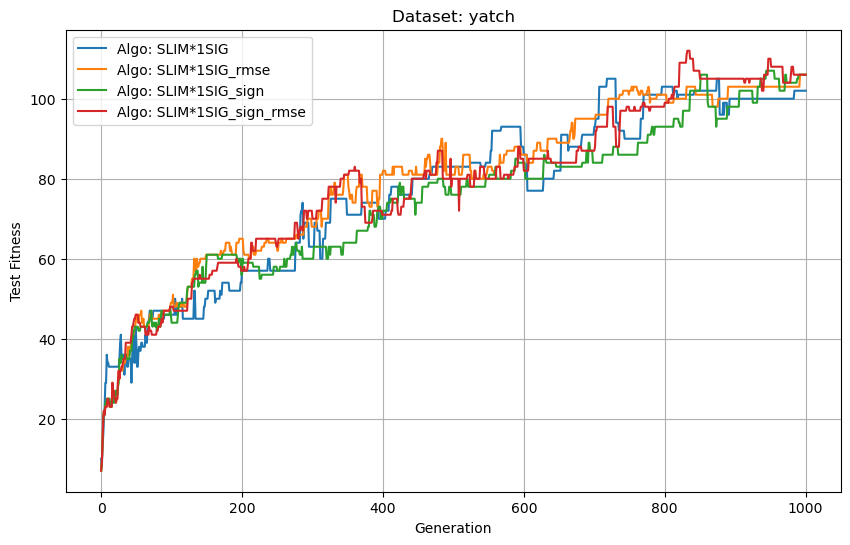

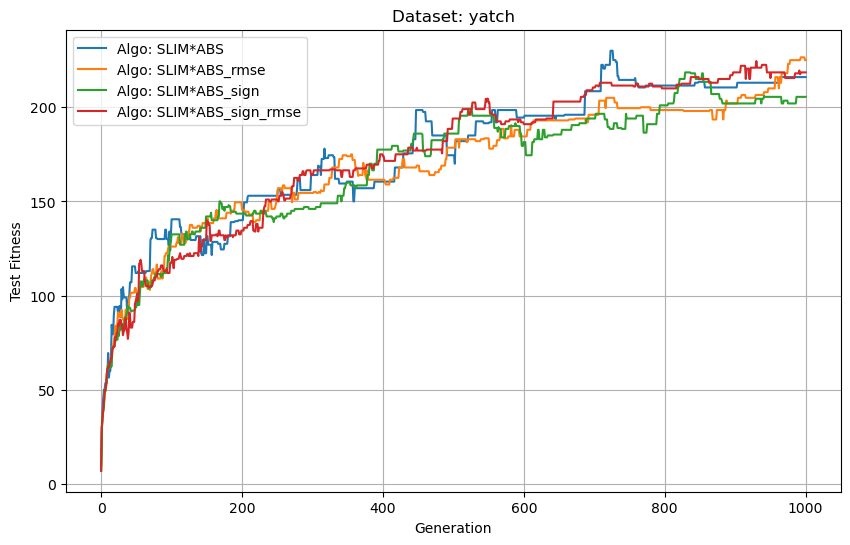

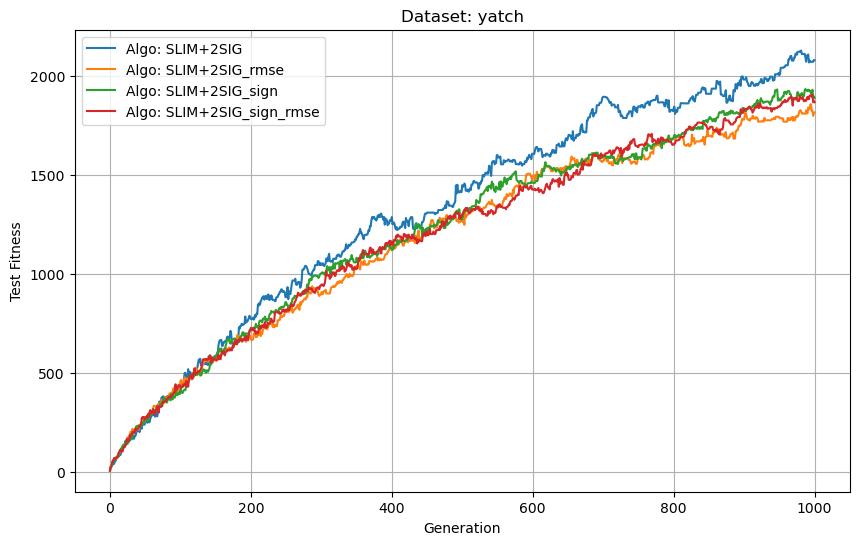

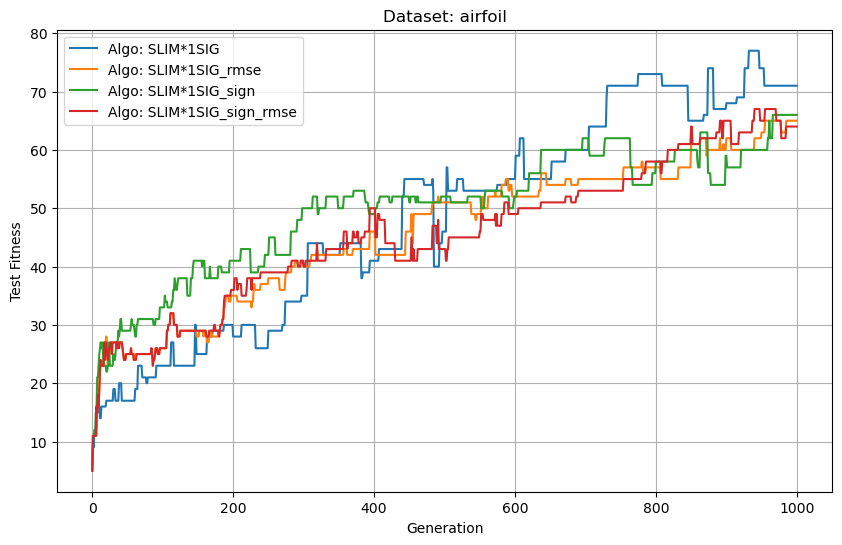

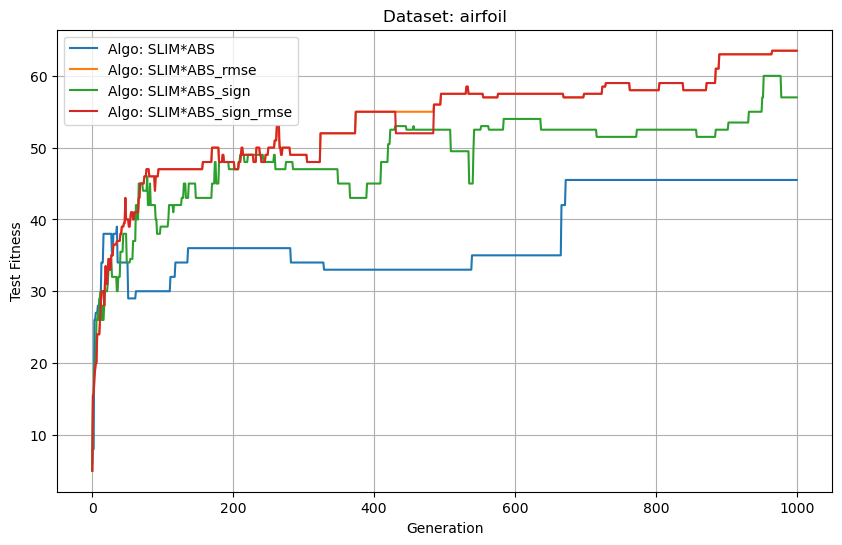

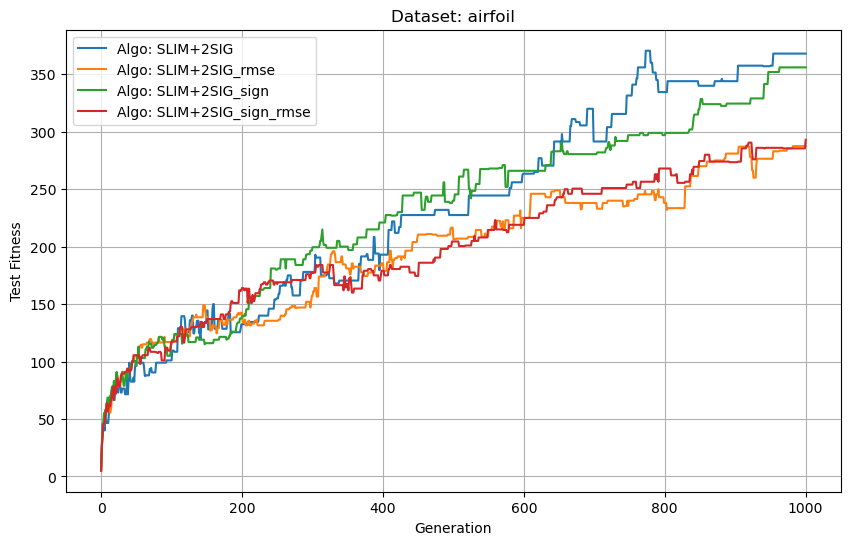

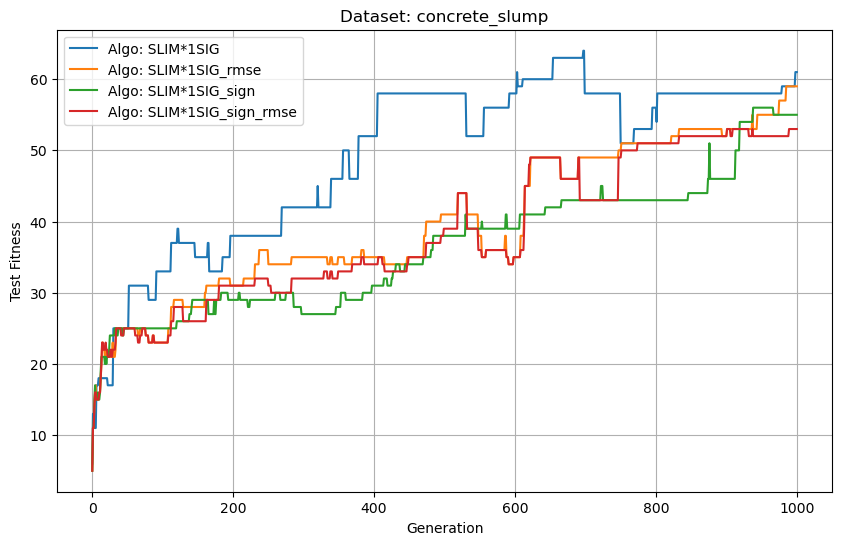

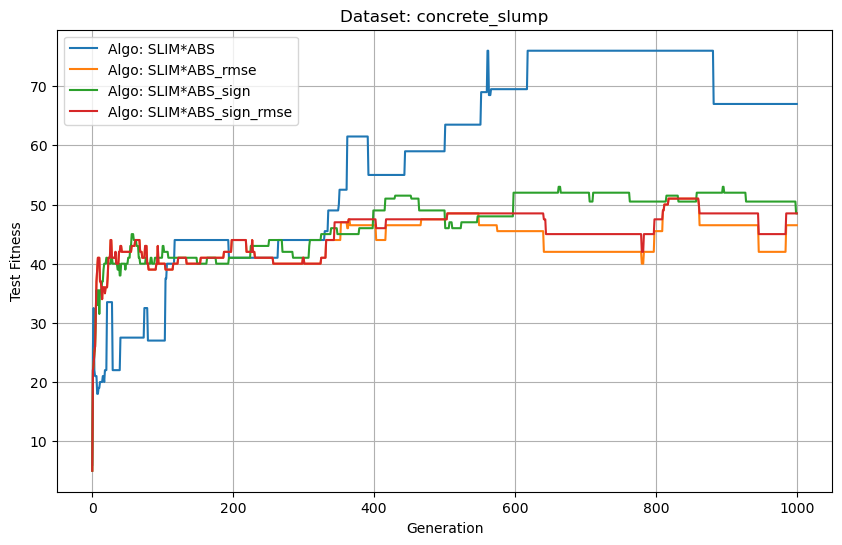

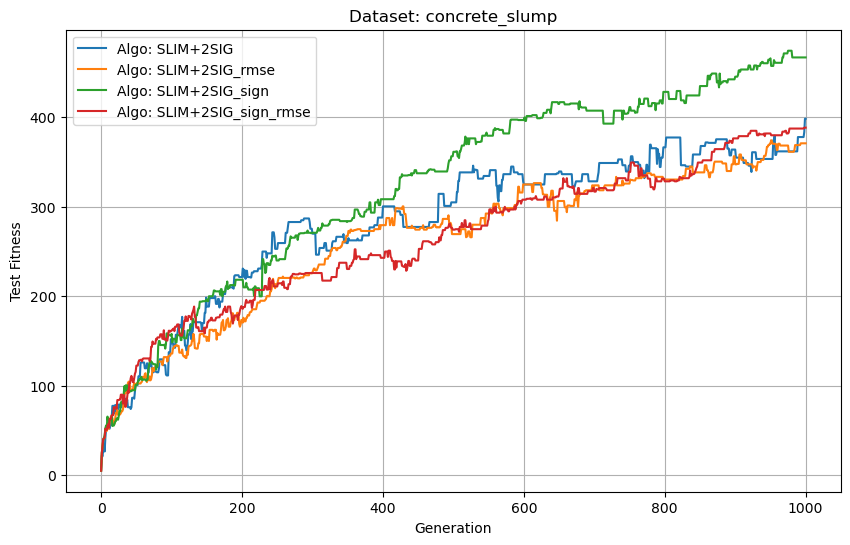

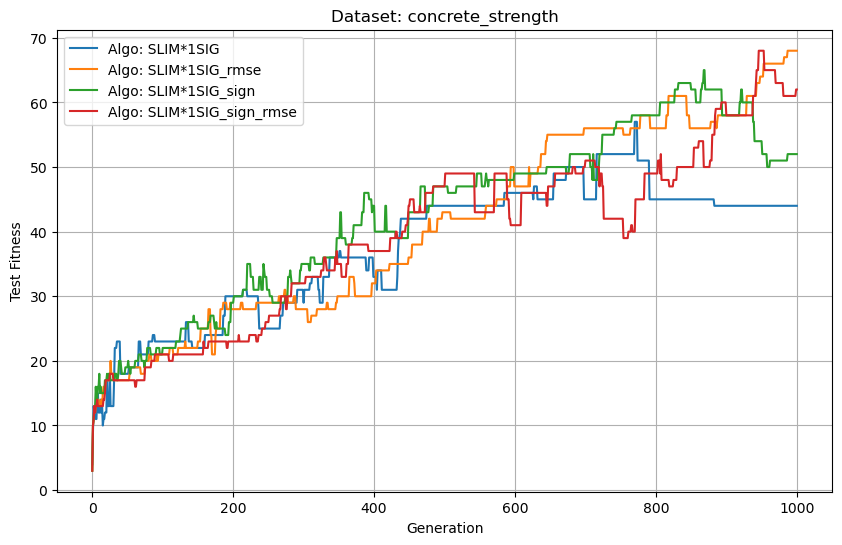

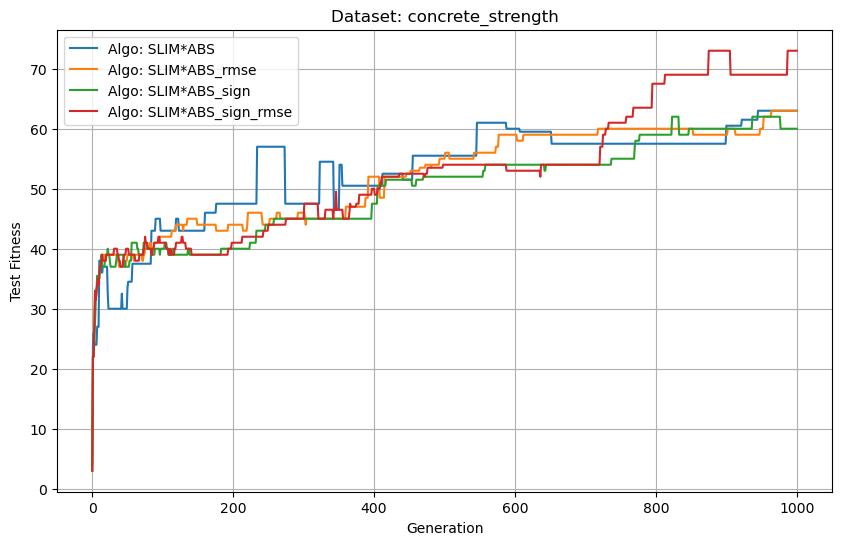

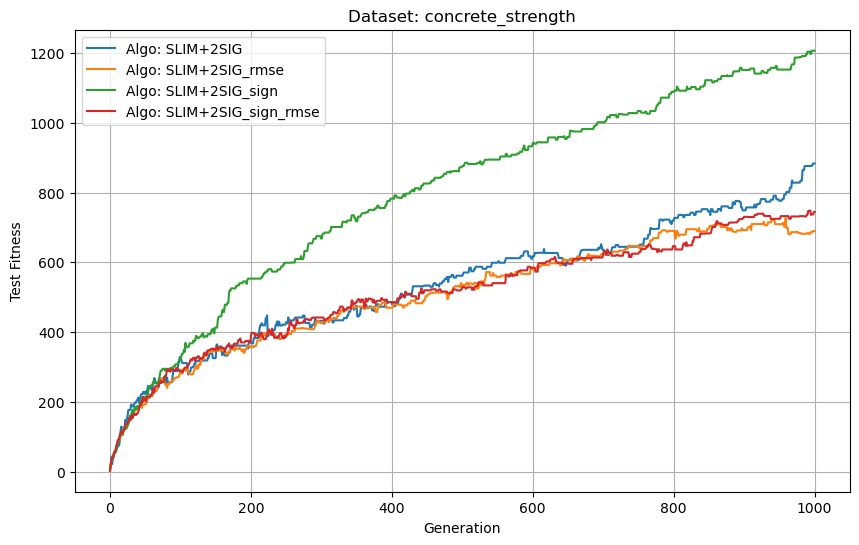

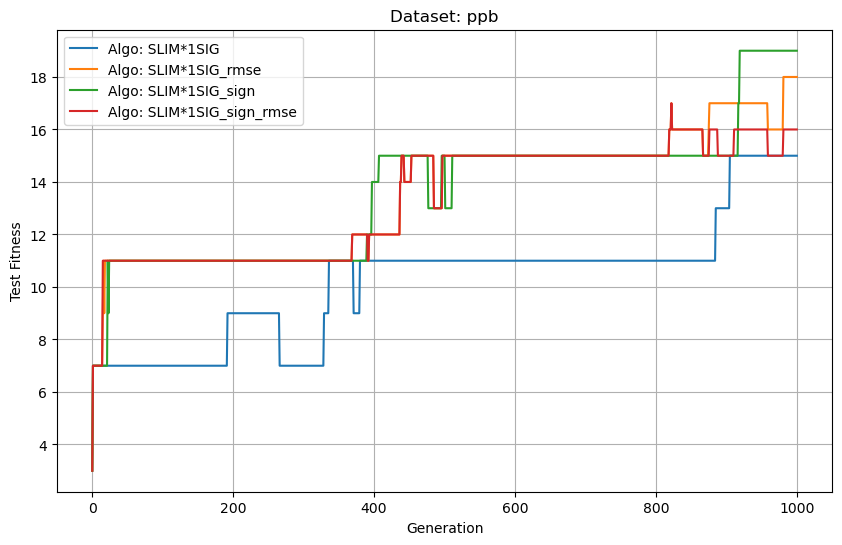

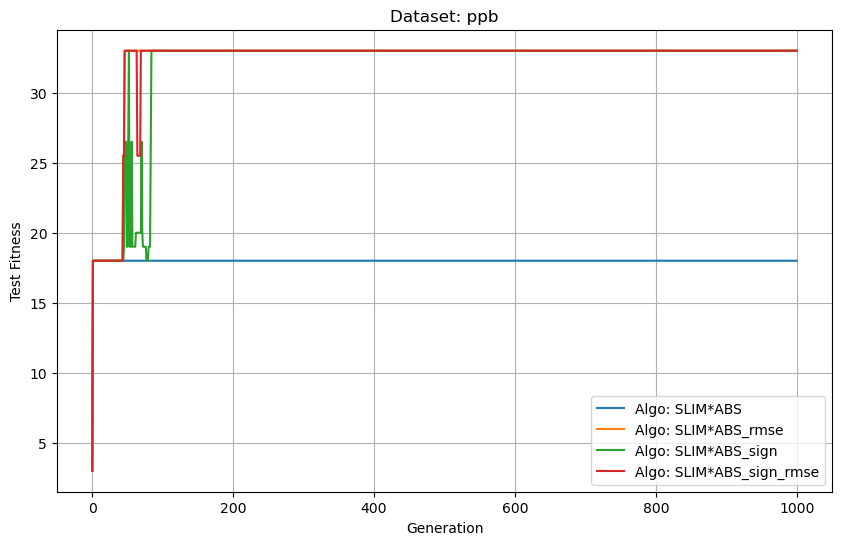

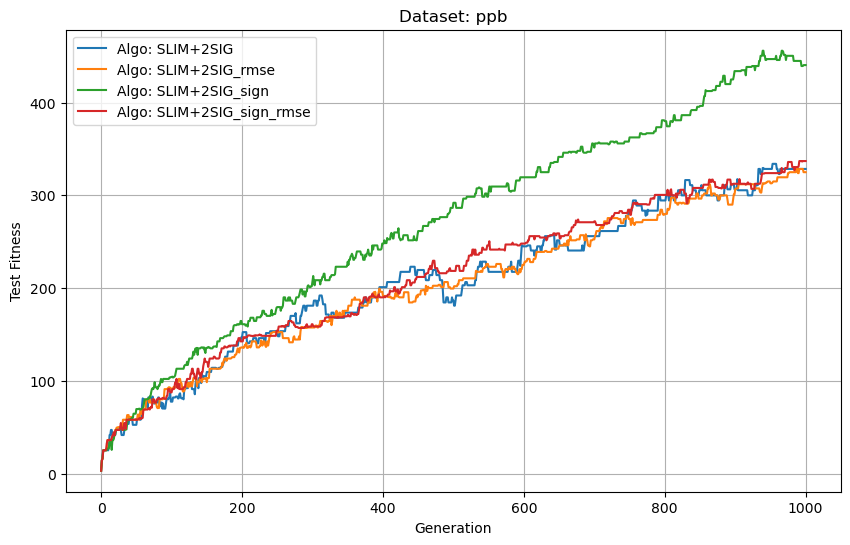

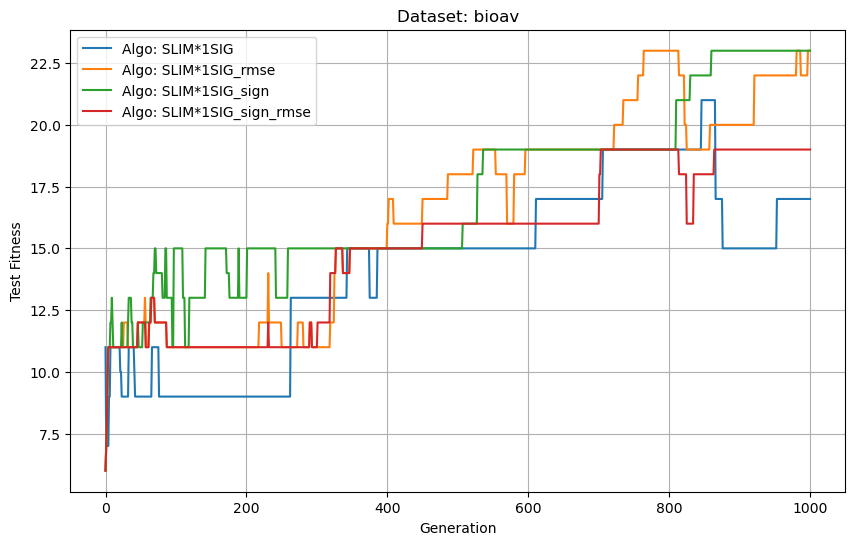

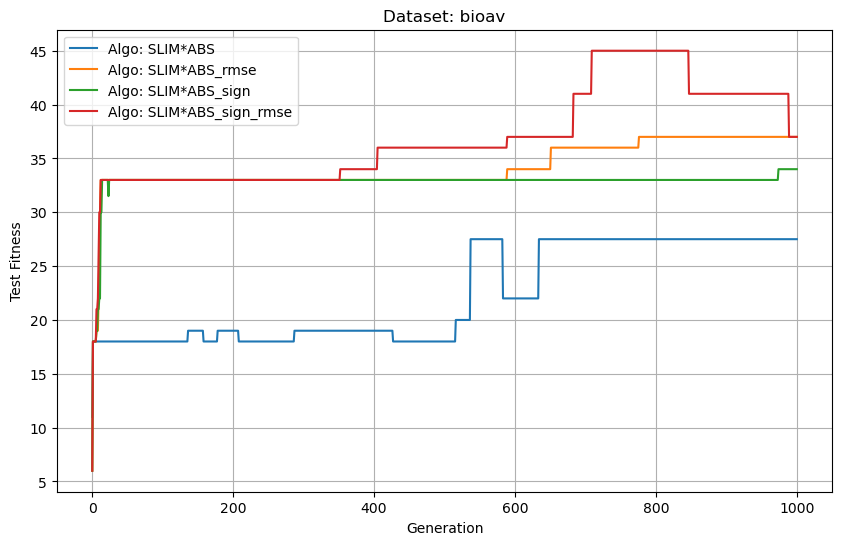

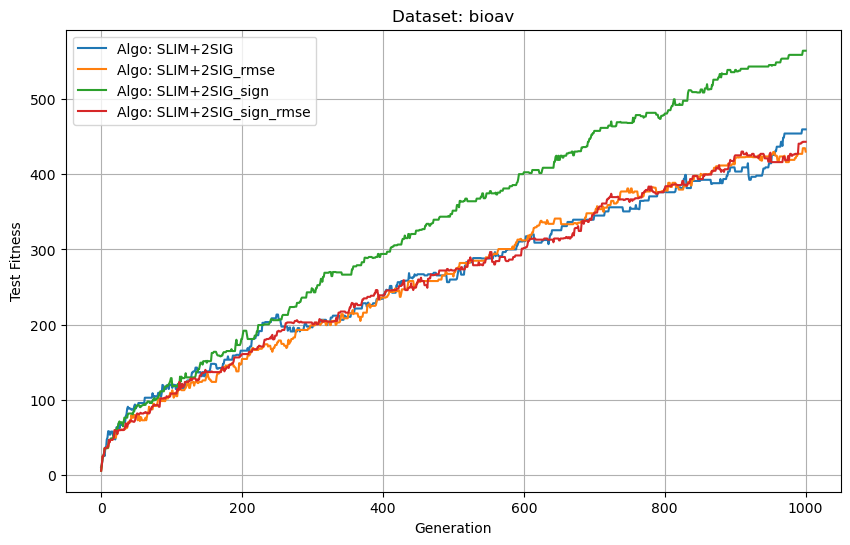

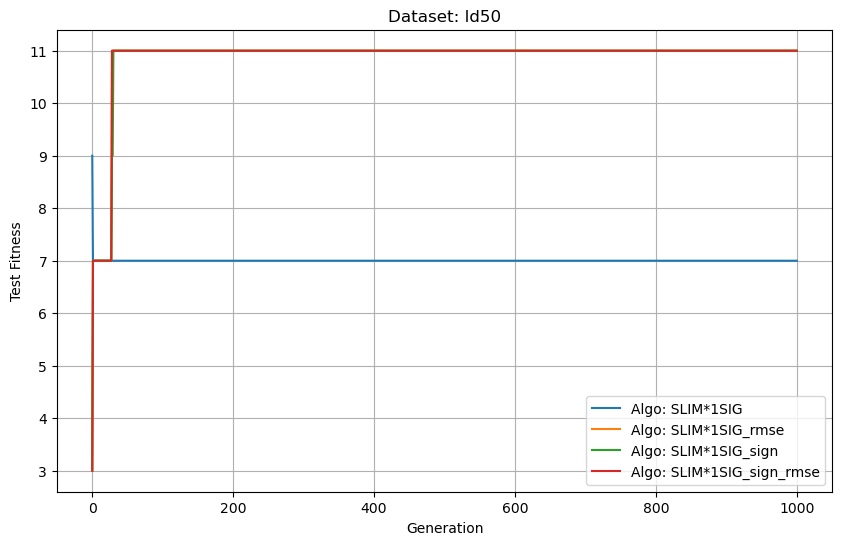

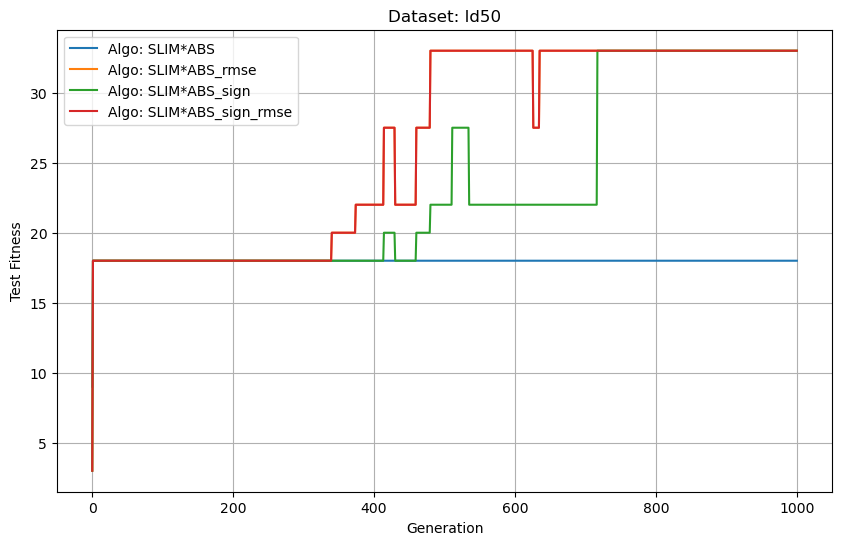

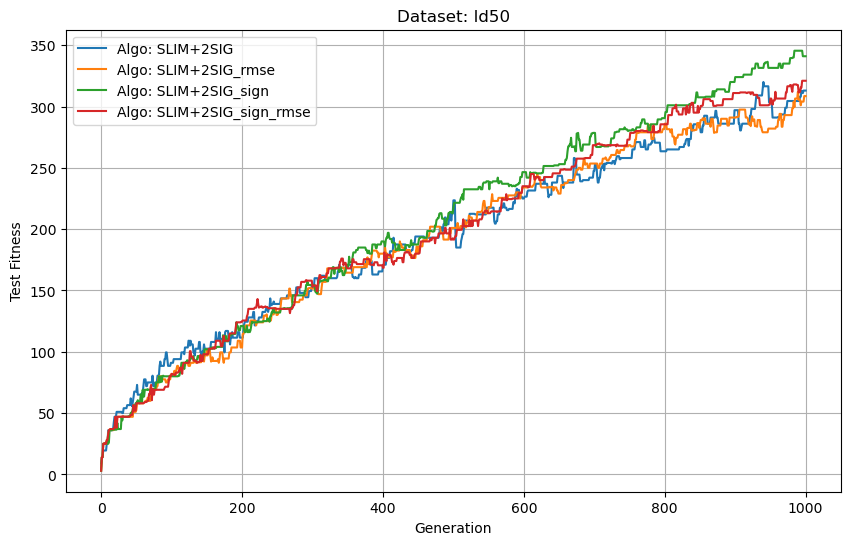

In [115]:
# Iterate through datasets and algorithm types
for dataset in baseline.dataset.unique():

    for algo_type in algo_types:
        plt.figure(figsize=(10, 6))  # Optional: Adjust figure size for better visualization
        
        for algo in algo_type:
            
            # Group and plot data for the current algorithm and dataset
            grouped = (
                baseline.query("algo == @algo and dataset == @dataset")[["generation", "test_fitness", "elite_size"]]
                .groupby("generation")
                .median()
            )
            plt.plot(grouped.index, grouped["elite_size"], label=f"Algo: {algo}")
    
        # Add title, legend, and labels for the dataset
        plt.title(f"Dataset: {dataset}")
        plt.xlabel("Generation")
        plt.ylabel("Test Fitness")
        plt.legend()
        plt.grid(True)
        plt.show()



In [35]:
# Directory to save the .txt files
output_dir = "fselection_txt"
os.makedirs(output_dir, exist_ok=True)

# Iterate through datasets and algorithm types
for dataset in baseline.dataset.unique():
    for algo_type in algo_types:
        result_dict = {}

        # Process each algorithm within the current algorithm type
        for algo in algo_type:
            # Group data by generation for the current algorithm and dataset
            grouped = (
                baseline.query("algo == @algo and dataset == @dataset and generation % 3 == 0")[["generation", "test_fitness", "elite_size"]]
                .groupby("generation")
                .median()
            )

            # Store test_fitness values in the result dictionary
            result_dict[algo] = grouped["test_fitness"].values

        # Align data by generation (assuming generations are sorted)
        # max_length = max(len(values) for values in result_dict.values())
        # for key in result_dict:
        #     result_dict[key] = list(result_dict[key]) + [None] * (max_length - len(result_dict[key]))

        # Create a DataFrame for saving as a .txt file
        df = pd.DataFrame(result_dict)
        df.index = grouped.index
        df.index.name = "Generation"  # Optional: Add an index name for clarity

        # Define file name and path
        algo_type_label = algo_type[0][-4:]  # Assume algo_type is iterable, like ['*1SIG', '+2SIG', '*ABS']
        algo_type_label = algo_type_label.replace("*", "X")
        filename = f"{dataset}_{algo_type_label}.txt"
        filepath = os.path.join(output_dir, filename)

        # Save the DataFrame to a .txt file
        df.to_csv(filepath, sep="\t", index=True, na_rep="NaN")


In [36]:
df

,SLIM+2SIG,GSGP,SLIM+2SIG_rmse,SLIM+2SIG_sign,SLIM+2SIG_sign_rmse
Generation,,,,,
0,2245.446533,2245.446533,2308.071167,2308.071167,2308.071167
3,2118.882935,2152.201782,2141.338013,2141.338013,2141.338013
6,2109.799316,2152.201782,2094.949585,2093.747070,2094.949585
9,2103.413208,2127.591919,2092.024902,2113.249634,2092.024902
12,2084.787109,2157.458008,2080.703857,2080.703857,2080.703857
...,...,...,...,...,...
987,2052.122131,2170.069580,2050.330139,2062.526245,2041.643738
990,2053.862793,2170.069580,2053.356079,2062.526245,2042.501099
993,2057.065002,2170.069580,2053.078857,2062.526245,2042.501099


In [7]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

# Assuming 'baseline' is your DataFrame containing columns: 'dataset', 'algo', 'generation', 'test_fitness', 'run'
# 'run' is an identifier for the different runs (i.e., 30 runs)

# Iterate through each dataset
for dataset in baseline.dataset.unique():
    # Iterate through each algorithm type group
    for algo_type in algo_types:
        # Initialize a dictionary to store the test fitness data for each algorithm
        dataset_algo_data = {}

        # Collect test fitness data for each algorithm across all 30 runs
        for algo in algo_type:
            # Filter the data for the current algorithm and dataset
            algo_data = baseline.query(
                "algo == @algo and dataset == @dataset and generation == 1000"
            )[["seed", "test_fitness"]]

            # Store the test fitness values for all runs
            dataset_algo_data[algo] = algo_data["test_fitness"].values

        # Create an empty matrix to store p-values between algorithms
        p_value_matrix = np.zeros((len(algo_type), len(algo_type)))

        # Calculate p-values for pairwise comparisons between algorithms across all runs
        for i, algo1 in enumerate(algo_type):
            for j, algo2 in enumerate(algo_type):
                if i < j:
                    # Mann-Whitney U test between algo1 and algo2 across all runs
                    data1 = dataset_algo_data[algo1]
                    data2 = dataset_algo_data[algo2]
                    u_stat, p_value = mannwhitneyu(data1, data2)
                    p_value_matrix[i, j] = p_value
                    p_value_matrix[j, i] = p_value  # Symmetric matrix

        # Convert the p-value matrix to a DataFrame for LaTeX formatting
        p_values_df = pd.DataFrame(p_value_matrix, columns=algo_type, index=algo_type)

        # Generate LaTeX table for the dataset and algorithm type
        # algo_type_label = "_".join(algo_type)  # Join the algorithms if multiple
        algo_type_label = algo_type[0][-4:]  # Assume algo_type is iterable, like ['*1SIG', '+2SIG', '*ABS']
        # algo_type_label = algo_type_label.replace("*", "X")
        caption = f"P-Values for {dataset} with Algorithm Type {algo_type_label}"

        # Generate the LaTeX table code with caption
        latex_code = p_values_df.to_latex(
            caption=caption,
            label=f"tab:{dataset}_{algo_type_label}_pvalues_matrix",
            index=True,
            header=True
        )

        # Print the LaTeX code for the p-values table
        print(latex_code)
        # print("\n" + "=" * 50 + "\n")


\begin{table}
\caption{P-Values for yatch with Algorithm Type 1SIG}
\label{tab:yatch_1SIG_pvalues_matrix}
\begin{tabular}{lrrrrr}
\toprule
 & GSGP*1SIG & SLIM*1SIG & SLIM*1SIG_rmse & SLIM*1SIG_sign & SLIM*1SIG_sign_rmse \\
\midrule
GSGP*1SIG & 0.000000 & 0.101665 & 0.001536 & 0.001650 & 0.000022 \\
SLIM*1SIG & 0.101665 & 0.000000 & 0.668582 & 0.668582 & 0.405969 \\
SLIM*1SIG_rmse & 0.001536 & 0.668582 & 0.000000 & 0.786904 & 0.157152 \\
SLIM*1SIG_sign & 0.001650 & 0.668582 & 0.786904 & 0.000000 & 0.208688 \\
SLIM*1SIG_sign_rmse & 0.000022 & 0.405969 & 0.157152 & 0.208688 & 0.000000 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}
\caption{P-Values for yatch with Algorithm Type *ABS}
\label{tab:yatch_*ABS_pvalues_matrix}
\begin{tabular}{lrrrrr}
\toprule
 & GSGP*ABS & SLIM*ABS & SLIM*ABS_rmse & SLIM*ABS_sign & SLIM*ABS_sign_rmse \\
\midrule
GSGP*ABS & 0.000000 & 0.271499 & 0.000333 & 0.002192 & 0.000004 \\
SLIM*ABS & 0.271499 & 0.000000 & 0.405969 & 0.596928 & 0.124513 \\
SLIM*ABS

In [59]:
grouped.to_numpy

array([[0.11212552],
       [0.02167356],
       [0.04205501],
       [0.04619813],
       [0.09398997]])

In [78]:
grouped.to_numpy().flatten().tolist()

[0.11212551593780515,
 0.021673560142517048,
 0.04205501079559325,
 0.0461981296539306,
 0.09398996829986565]

In [85]:
# Iterate through datasets and algorithm types
results = {}
for algo_type in algo_types:
    intermediate_results = {}
  # Optional: Adjust figure size for better visualization
        
        # for algo in algo_type:
            
            # Group and plot data for the current algorithm and dataset
    for dataset in baseline.dataset.unique():
    
    # print(dataset)
    
    
        grouped = (
            baseline.query("algo in @algo_type and dataset == @dataset")[["algo","timing"]]
            .groupby("algo")
            .median()
        )
    
        intermediate_results[dataset] = grouped.to_numpy().flatten().tolist()

    results[algo_type[0][-4:]] = intermediate_results
        # print(grouped)

In [104]:
results_2sig = pd.DataFrame(results['2SIG']).T
results_2sig.columns = algo_types[2]
results_1sig = pd.DataFrame(results['1SIG']).T
results_1sig.columns = algo_types[0]
results_1abs = pd.DataFrame(results['*ABS']).T
results_1abs.columns = algo_types[1]

In [106]:
results_2sig

,SLIM+2SIG,GSGP,SLIM+2SIG_rmse,SLIM+2SIG_sign,SLIM+2SIG_sign_rmse
yatch,0.128629,0.050478,0.114844,0.123583,0.283903
airfoil,0.274951,0.034515,0.036499,0.039128,0.046924
concrete_slump,0.136538,0.029858,0.041166,0.046958,0.071658
concrete_strength,0.250185,0.047559,0.070389,0.113154,0.136880
ppb,0.192575,0.040173,0.055062,0.067015,0.107354
bioav,0.241542,0.031059,0.054575,0.068770,0.115946
ld50,0.112126,0.021674,0.042055,0.046198,0.093990


In [107]:
results_1sig

,SLIM*1SIG,GSGP*1SIG,SLIM*1SIG_rmse,SLIM*1SIG_sign,SLIM*1SIG_sign_rmse
yatch,0.082431,0.024751,0.025730,0.024745,0.034985
airfoil,0.202017,0.028135,0.019050,0.018985,0.020132
concrete_slump,0.170586,0.024168,0.016108,0.016142,0.016891
concrete_strength,0.105837,0.028268,0.023374,0.023182,0.025181
ppb,0.129319,0.034714,0.019878,0.020072,0.021548
bioav,0.181481,0.022785,0.015738,0.015736,0.017467
ld50,0.125497,0.033357,0.010163,0.010157,0.010997


In [108]:
results_1abs

,SLIM*ABS,GSGP*ABS,SLIM*ABS_rmse,SLIM*ABS_sign,SLIM*ABS_sign_rmse
yatch,0.067039,0.023879,0.027256,0.027319,0.040845
airfoil,0.216357,0.032817,0.018477,0.018408,0.019013
concrete_slump,0.136460,0.027703,0.016064,0.016056,0.016594
concrete_strength,0.105586,0.029233,0.022830,0.022791,0.024205
ppb,0.163638,0.036830,0.019932,0.019964,0.021381
bioav,0.213798,0.027652,0.015418,0.015415,0.016363
ld50,0.154052,0.033373,0.010130,0.010113,0.010816
